In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/My Drive/DATASETS/Iris.csv")

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x = np.array(data.iloc[:, 1:5])
y = np.array(data['Species'])

In [13]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
acc = []
for i in range(1, 51):
  knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', n_jobs = -1)
  score = cross_val_score(knn, x_train, y_train, cv = 10)
  acc.append(score.mean())

In [20]:
print("The best accuracy is {} at {}-NN".format(max(acc), acc.index(max(acc))+1))

The best accuracy is 0.9536363636363637 at 11-NN


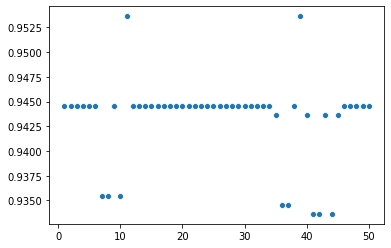

In [17]:
sns.scatterplot(x = np.arange(1,51), y = acc)

In [22]:
# Creating 11-NN

knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance', n_jobs = -1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred, normalize = True)
print("The accuracy for 11-NN is : {}".format(accuracy*100))

The accuracy for 11-NN is : 100.0


In [35]:
# creating my own test dataset for prediction
own_test = np.array([4.6,3.1,1.5,0.2]).reshape(1,4)

In [36]:
knn.predict(own_test)

array(['Iris-setosa'], dtype=object)